In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot

In [47]:
Tokyo=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
Tokyo.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [48]:
Tokyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [49]:
Tokyo2=Tokyo[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Tokyo2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [50]:
Tokyo2.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [51]:
Tokyo3=Tokyo2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
Tokyo3.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [52]:
Tokyo3[Tokyo3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [53]:
Tokyo3=Tokyo3.drop_duplicates().reset_index(drop=True)
Tokyo3[Tokyo3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight


In [54]:
Tokyo3.info()
Tokyo3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1435 non-null   int64
 1   Age     1435 non-null   int64
 2   KM      1435 non-null   int64
 3   HP      1435 non-null   int64
 4   CC      1435 non-null   int64
 5   Doors   1435 non-null   int64
 6   Gears   1435 non-null   int64
 7   QT      1435 non-null   int64
 8   Weight  1435 non-null   int64
dtypes: int64(9)
memory usage: 101.0 KB


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [55]:
Tcorr=Tokyo3.corr().round(2)
Tcorr

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.00,-0.88,-0.57,0.31,0.12,0.18,0.06,0.21,0.58
Age,-0.88,1.00,0.50,-0.16,-0.10,-0.15,-0.01,-0.19,-0.47
KM,-0.57,0.50,1.00,-0.33,0.10,-0.04,0.01,0.28,-0.02
HP,0.31,-0.16,-0.33,1.00,0.04,0.09,0.21,-0.30,0.09
CC,0.12,-0.10,0.10,0.04,1.00,0.08,0.01,0.31,0.34
Doors,0.18,-0.15,-0.04,0.09,0.08,1.00,-0.16,0.11,0.30
Gears,0.06,-0.01,0.01,0.21,0.01,-0.16,1.00,-0.01,0.02
QT,0.21,-0.19,0.28,-0.30,0.31,0.11,-0.01,1.00,0.62
Weight,0.58,-0.47,-0.02,0.09,0.34,0.30,0.02,0.62,1.00


Text(0.5, 1.0, 'Weight-No transformation')

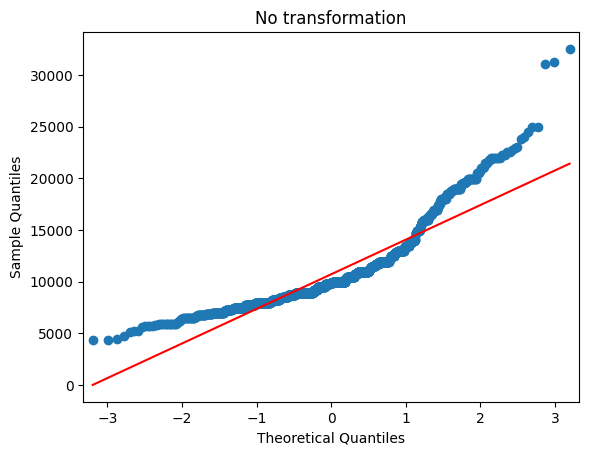

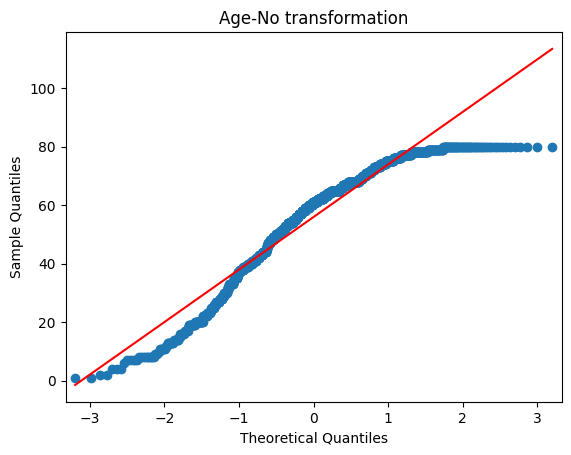

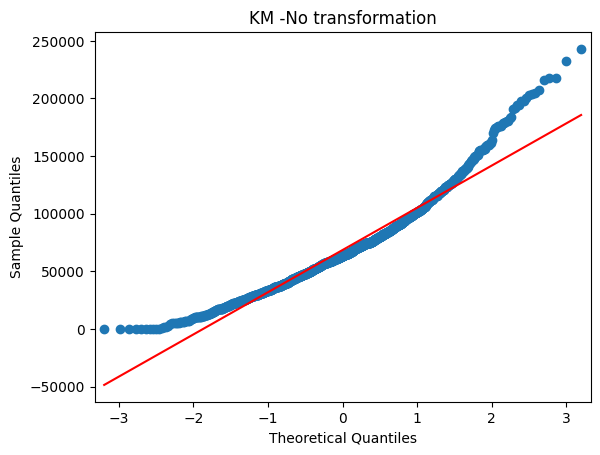

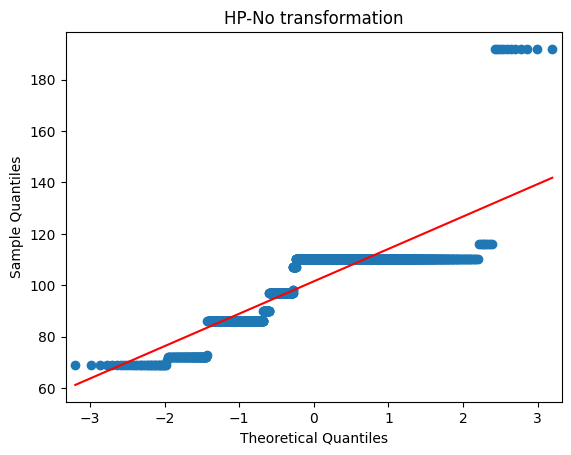

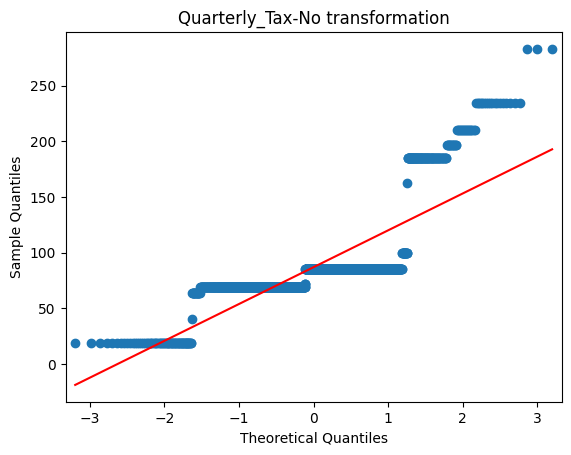

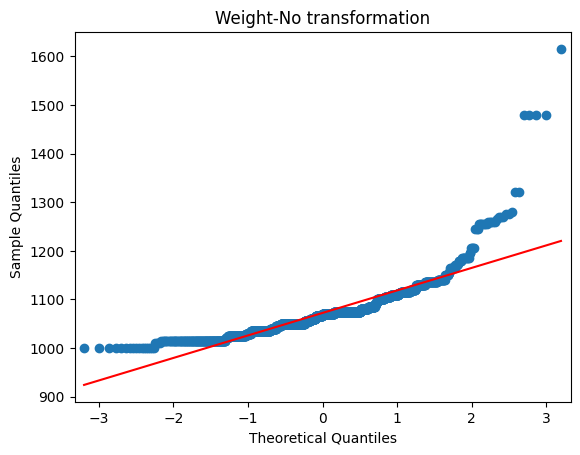

In [56]:
qqplot(Tokyo3['Price'], line = 'r')
plt.title('No transformation')
qqplot(Tokyo3['Age'], line = 'r')
plt.title('Age-No transformation')
qqplot(Tokyo3['KM'], line = 'r')
plt.title('KM -No transformation')
qqplot(Tokyo3['HP'], line = 'r')
plt.title('HP-No transformation')
qqplot(Tokyo3['QT'], line = 'r')
plt.title('Quarterly_Tax-No transformation')
qqplot(Tokyo3['Weight'], line = 'r')
plt.title('Weight-No transformation')

Text(0.5, 1.0, 'Weight-Square root transformation')

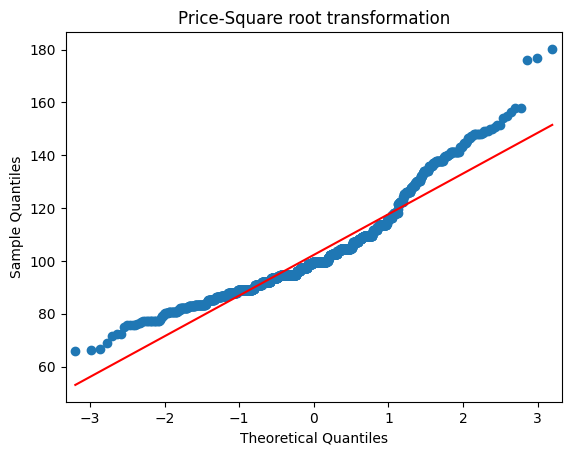

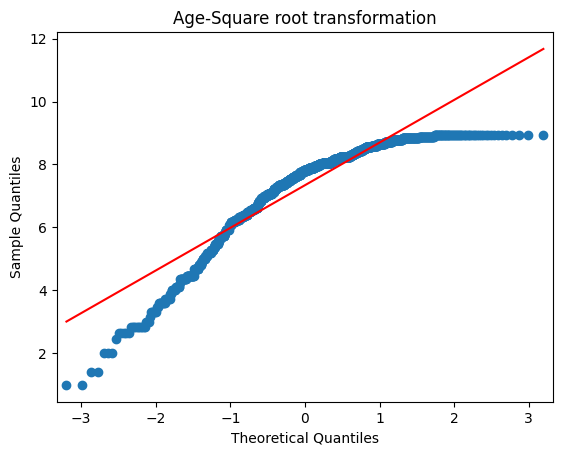

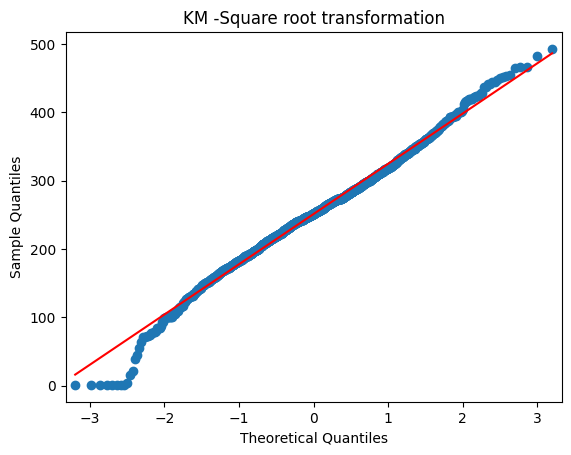

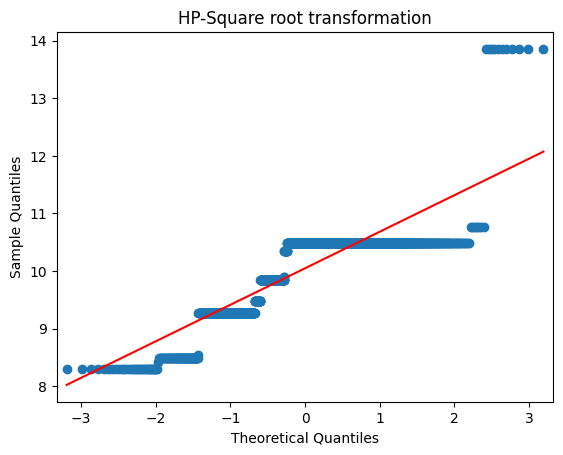

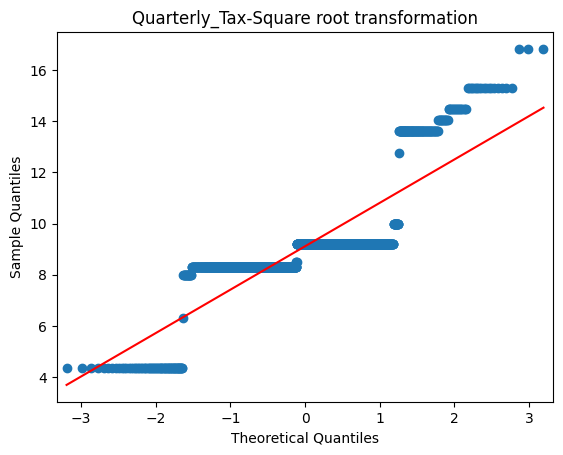

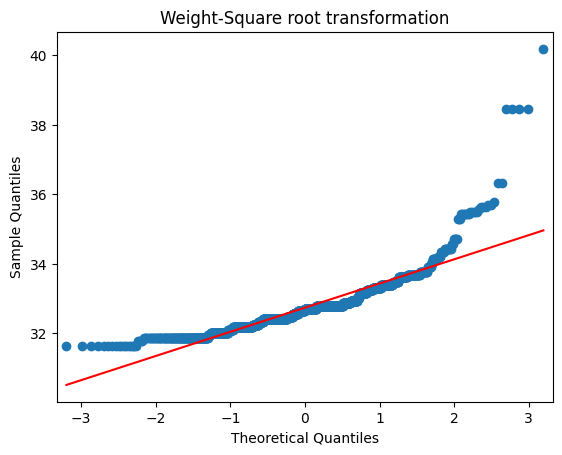

In [57]:
qqplot(np.sqrt(Tokyo3['Price']), line = 'r')
plt.title('Price-Square root transformation')
qqplot(np.sqrt(Tokyo3['Age']), line = 'r')
plt.title('Age-Square root transformation')
qqplot(np.sqrt(Tokyo3['KM']), line = 'r')
plt.title('KM -Square root transformation')
qqplot(np.sqrt(Tokyo3['HP']), line = 'r')
plt.title('HP-Square root transformation')
qqplot(np.sqrt(Tokyo3['QT']), line = 'r')
plt.title('Quarterly_Tax-Square root transformation')
qqplot(np.sqrt(Tokyo3['Weight']), line = 'r')
plt.title('Weight-Square root transformation')

Text(0.5, 1.0, 'Weight-Log transformation')

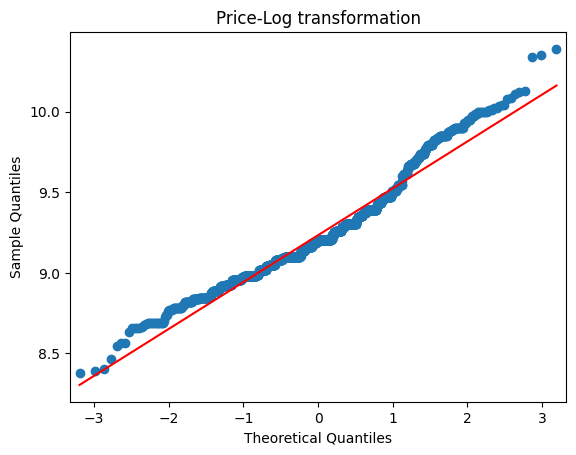

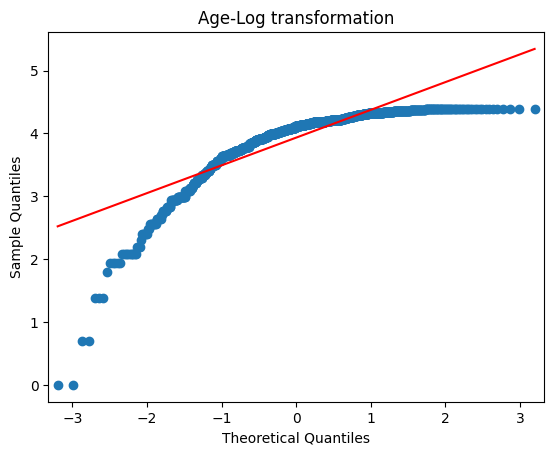

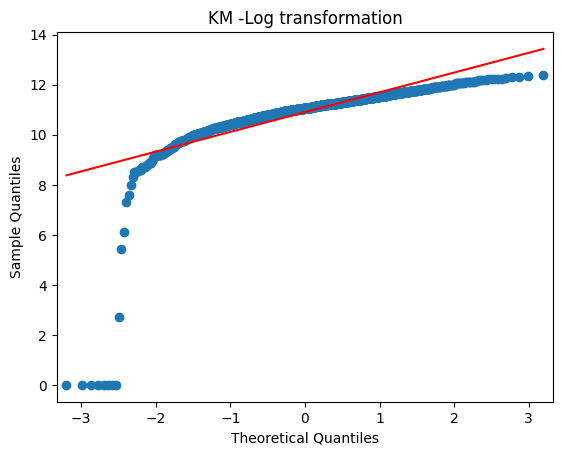

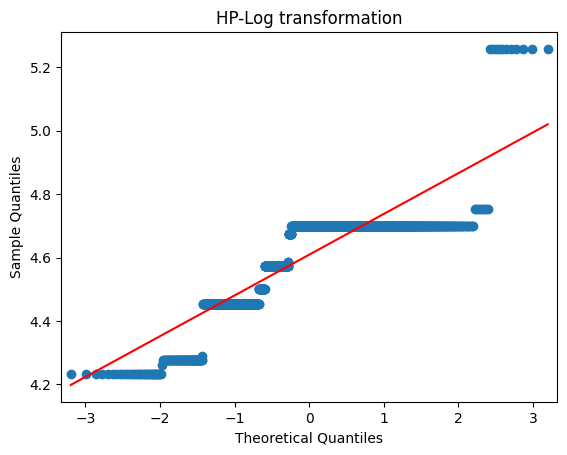

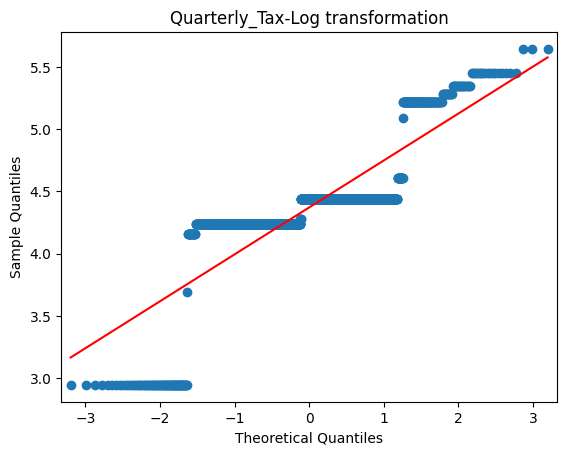

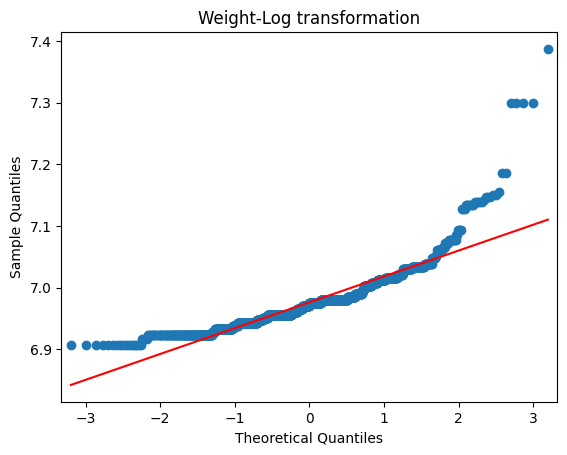

In [58]:
qqplot(np.log(Tokyo3['Price']), line = 'r')
plt.title('Price-Log transformation')
qqplot(np.log(Tokyo3['Age']), line = 'r')
plt.title('Age-Log transformation')
qqplot(np.log(Tokyo3['KM']), line = 'r')
plt.title('KM -Log transformation')
qqplot(np.log(Tokyo3['HP']), line = 'r')
plt.title('HP-Log transformation')
qqplot(np.log(Tokyo3['QT']), line = 'r')
plt.title('Quarterly_Tax-Log transformation')
qqplot(np.log(Tokyo3['Weight']), line = 'r')
plt.title('Weight-Log transformation')

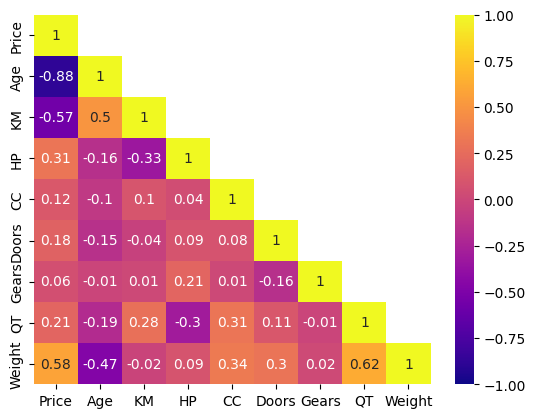

In [59]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(Tcorr, 
            annot=True,
            mask=np.triu(Tcorr,1),
            vmin=-1,
            vmax=1,
            cmap='plasma');

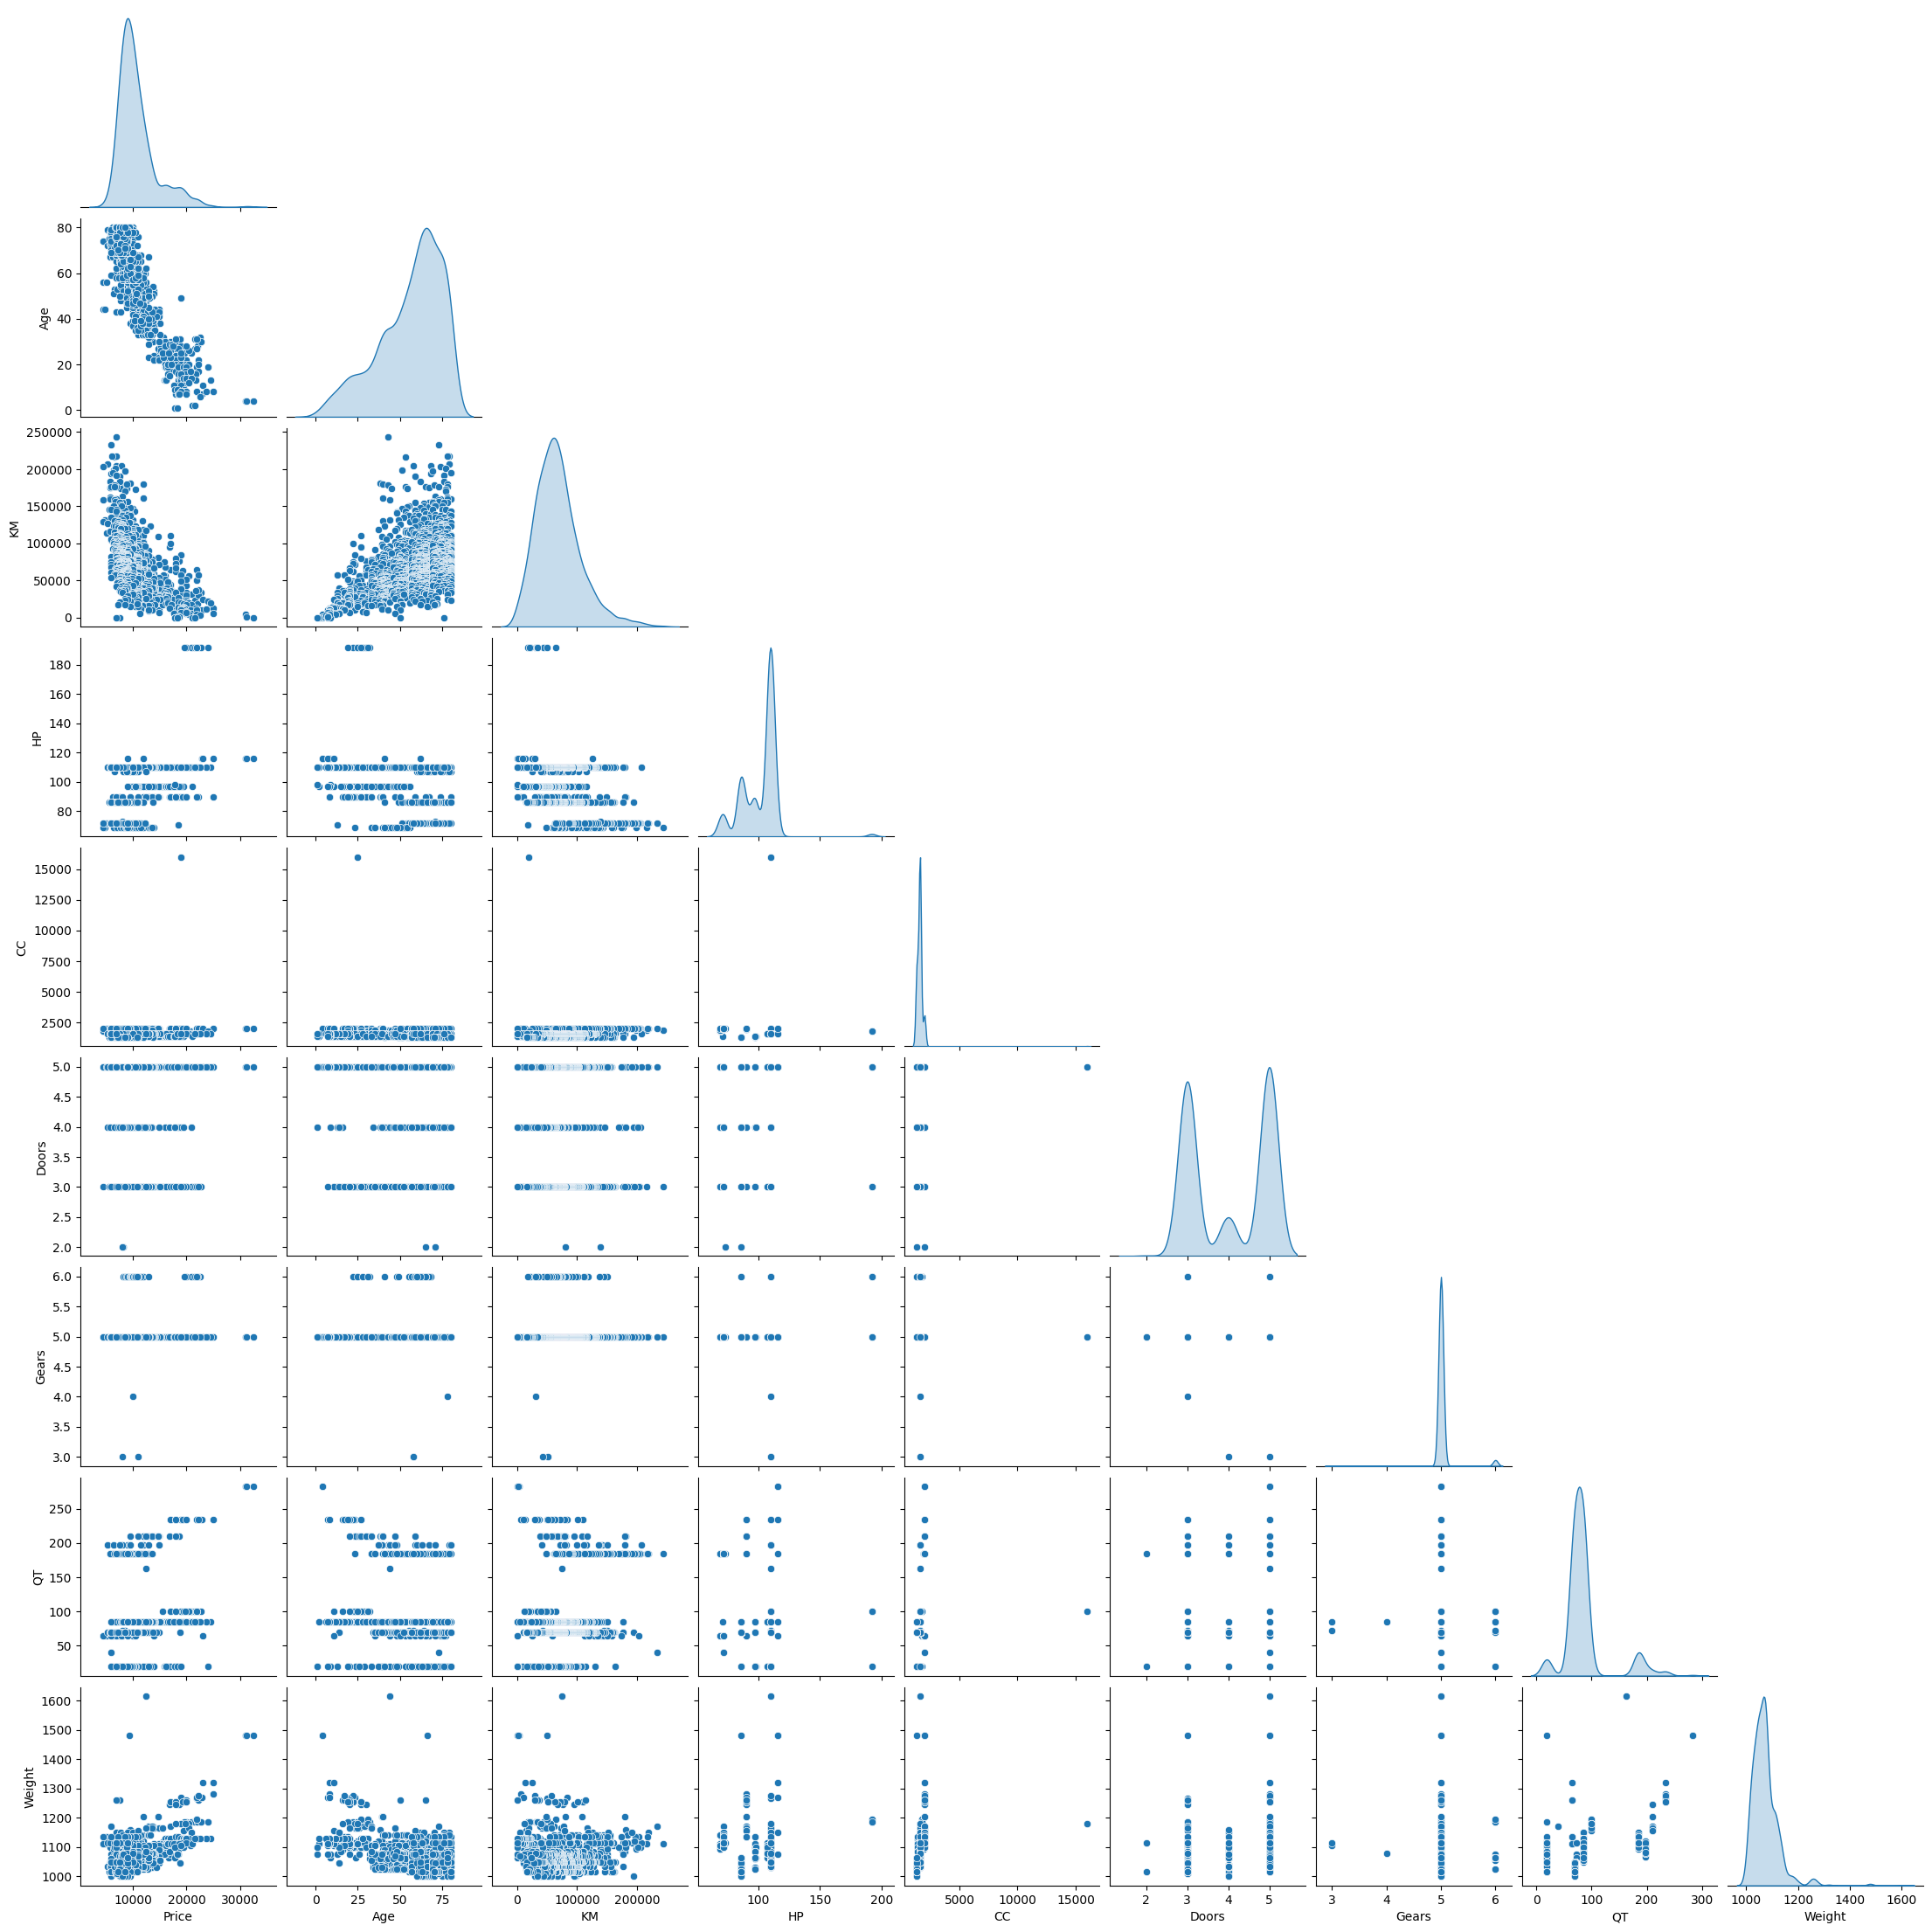

In [60]:
# pairplot
sns.pairplot(Tokyo3,
            corner=True,
            diag_kind='kde');

<AxesSubplot: xlabel='Weight'>

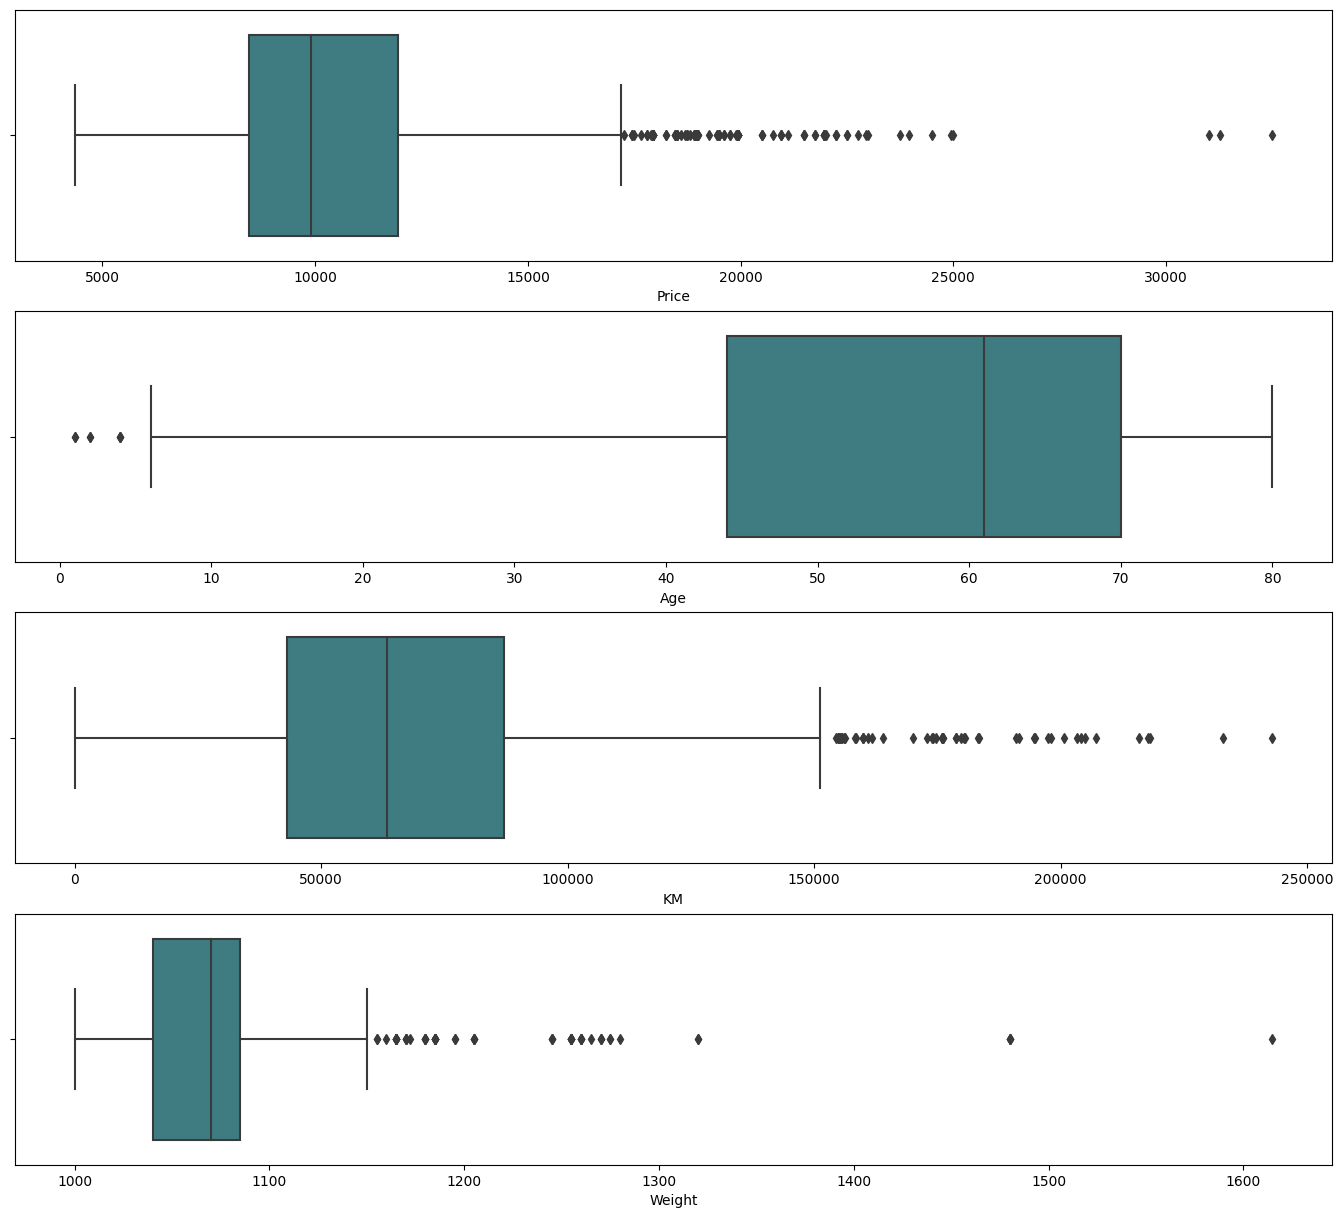

In [61]:
df=Tokyo3.copy() 
fig, axes=plt.subplots(4,1,figsize=(17,15),sharex=False,sharey=False)
sns.boxplot(x='Price',data=df,palette='crest',ax=axes[0])
sns.boxplot(x='Age',data=df,palette='crest',ax=axes[1])
sns.boxplot(x='KM',data=df,palette='crest',ax=axes[2])
sns.boxplot(x='Weight',data=df,palette='crest',ax=axes[3])

In [62]:
#We can't simply remove the outliers that would mean loss of information
#outline in  number its big 

In [63]:
## Multiple Linear Regression Model using statsmodels library

In [64]:
formula = 'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight'
model= ols(formula=formula, data=Tokyo3).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:12:08   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.0

In [65]:
## Simple Linear Regression with each independent feature vs the target feature Price
formula1 = 'Price~CC'
model1= ols(formula=formula1, data=Tokyo3).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.29e-06
Time:                        20:12:08   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.0

In [66]:
form2 = 'Price~Doors'
model2= ols(formula=form2, data=Tokyo3).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.40e-12
Time:                        20:12:08   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.0

In [67]:
DoorsMO = 'Price~Doors'
model2= ols(formula=DoorsMO, data=Tokyo3).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           2.40e-12
Time:                        20:12:08   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.0

In [68]:
# calculate VIF for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] =( [variance_inflation_factor(Tokyo3.values, i) for i in range(Tokyo3.shape[1])])
vif['features'] = Tokyo3.columns
vif.round(1)
vif

,VIF Factor,features
0,70.770259,Price
1,46.662057,Age
2,9.005938,KM
3,71.361440,HP
4,17.201048,CC
5,21.856498,Doors
6,439.792421,Gears
7,11.187125,QT
8,668.038614,Weight


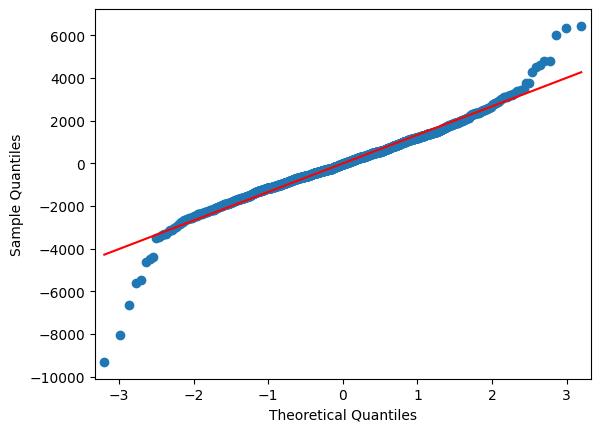

In [69]:
# check for the normality of the residuals - qqplot
from statsmodels.api import qqplot
qqplot(model.resid, line='s');

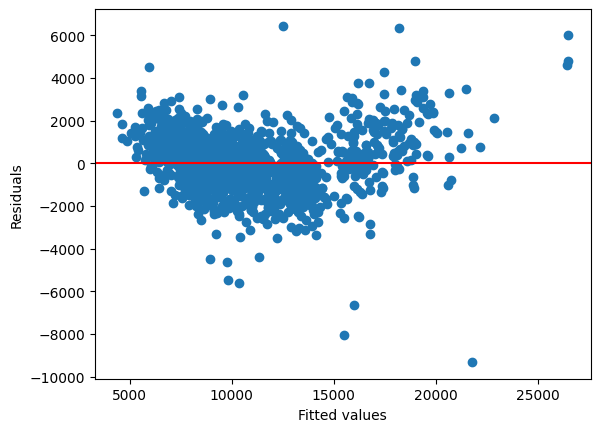

In [70]:
# check for homoscedasticity - residuals vs fitted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-');

In [71]:
# Observation deletion diagnostics - detect influential observations
# get cook's distance
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

In [72]:
#  greater than 4/no of observations
4/Tokyo3.shape[0] # 0.05

0.0027874564459930314

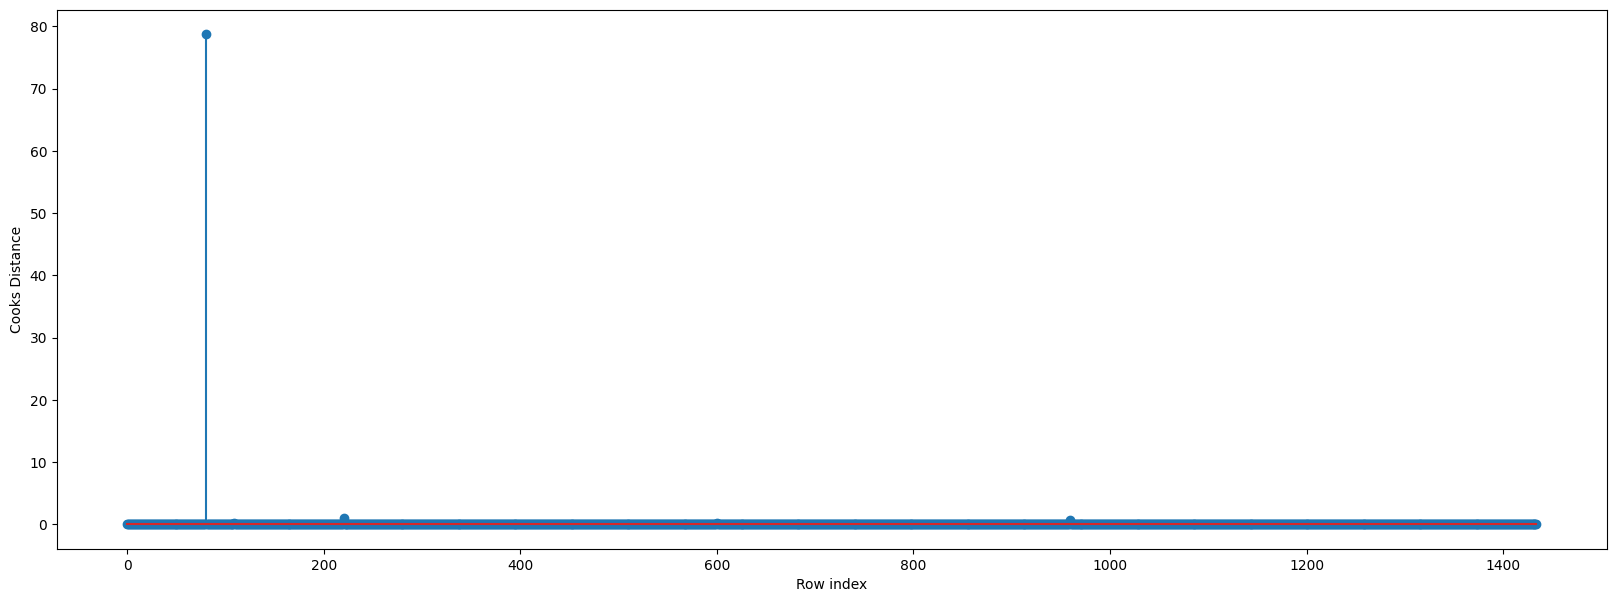

In [73]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Tokyo3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [74]:
# thumb rule for cook's distance - if cooks distance > 4/n, then the data point is influential
4/Tokyo3.shape[0]

0.0027874564459930314

In [75]:
# check which data points are influencers
cgreater = c>0.05
cgreater

array([False, False, False, ..., False, False, False])

In [76]:
# get the index of elements of cgreater where cgreater is True
idx_drop = np.where(cgreater)
idx_drop

(array([ 80, 109, 110, 111, 220, 600, 959, 990], dtype=int64),)

In [77]:
idx_drop[0]

array([ 80, 109, 110, 111, 220, 600, 959, 990], dtype=int64)

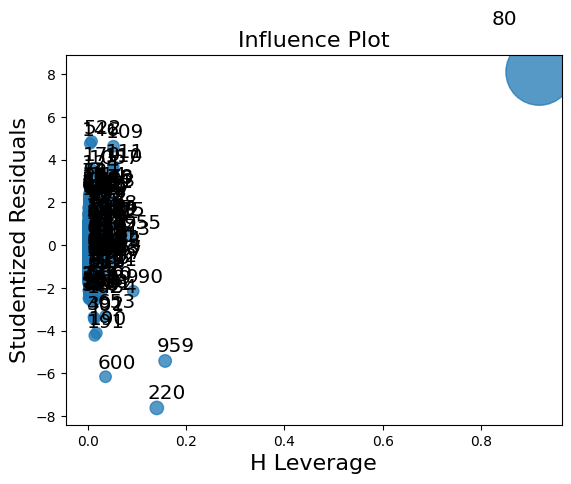

In [78]:
# influence plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model);

In [79]:
Tokyo3[80:]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180
81,17250,29,20000,110,1600,5,5,85,1115
82,15450,25,17003,97,1400,5,5,85,1110
83,17950,31,16238,110,1600,5,5,100,1180
84,16650,25,15414,97,1400,5,5,85,1110
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [80]:
## improving the model by removing the outliers/influencers
tokyo4=Tokyo3
tokyo4 = tokyo4.drop(idx_drop[0],axis=0).reset_index(drop=True)
tokyo4.head()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [81]:
formula5 = 'Price~Age+KM+HP+CC+Doors+Gears+QT+Weight'
model5= ols(formula=formula5, data=tokyo4).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1312.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:12:13   Log-Likelihood:                -12143.
No. Observations:                1427   AIC:                         2.430e+04
Df Residuals:                    1418   BIC:                         2.435e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.448e+04   1510.597     -9.583      0.0

In [82]:
# Manual Prediction of Price
pred_y=model5.predict(tokyo4)
pred_y

0       16311.442511
1       15857.111659
2       16292.601376
3       15960.114387
4       15837.005787
            ...     
1422     9146.725341
1423     8529.500509
1424     8675.426831
1425     8788.369478
1426    10816.043490
Length: 1427, dtype: float64

In [83]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=tokyo4.shape[1]
n=tokyo4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.02102312543798178